# MNIST Handwritten Digit Classification using Pytorch

In [ ]:
import torch as t
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import matplotlib.pyplot as plt

# 1. Loading your MNIST Digit Classification using PyTorch

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = t.utils.data.DataLoader(mnist_trainset, batch_size=10, shuffle=True)

mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = t.utils.data.DataLoader(mnist_testset, batch_size=10, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 111948342.40it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 62602425.75it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 27257752.17it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 11616176.08it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



# 2. Visualize several mnist datasets

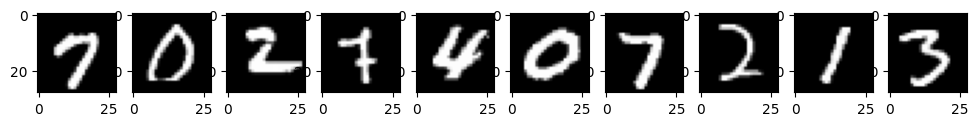

In [ ]:
import matplotlib.pyplot as plt

# Define a function to plot images
def Plot_images(images):
  fig, axs = plt.subplots(1, len(images), figsize=(12, 6))
  for i, image in enumerate(images):
    axs[i].imshow(image.squeeze().numpy(), cmap='gray')

# Get some images from the dataset
images, labels = next(iter(train_loader))
Plot_images(images[:10])

# 3. Design your Neural Network Model

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.linear1 = nn.Linear(28*28, 100) #28 * 28 is the pixels for each image
        self.linear2 = nn.Linear(100, 50) #100 and 5o
        self.final = nn.Linear(50, 10)
        self.relu = nn.ReLU()

    def forward(self, img): #convert + flatten
        x = img.view(-1, 28*28)
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.final(x)
        return x
net = Net()

# 4. Setup your hyperparameter such as Loss Function, Optimizer, Learning Rate, etc

In [ ]:
cross_el = nn.CrossEntropyLoss()
optimizer = t.optim.Adam(net.parameters(), lr=0.001) #e-1
epoch = 10

# 5. Develop a training loop and run a training model

In [ ]:
cross_el = nn.CrossEntropyLoss()
optimizer = t.optim.Adam(net.parameters(), lr=0.001) #e-1
epoch = 10

for epoch in range(epoch):
    net.train()

    for data in test_loader:
        x, y = data
        optimizer.zero_grad()
        output = net(x.view(-1, 28*28))
        loss = cross_el(output, y)
        loss.backward()
        optimizer.step()

# 6. Evaluate the Model using several performance metrics accuracy, confusion matrix, F1 Score, Precision, Recall,etc.

In [ ]:
correct = 0
total = 0

with t.no_grad():
    for data in train_loader:
        x, y = data
        output = net(x.view(-1, 784))
        for idx, i in enumerate(output):
            if t.argmax(i) == y[idx]:
                correct +=1
            total +=1
print(f'accuracy: {round(correct/total, 3)}')

accuracy: 0.948


# 7. Describe and explain your Result

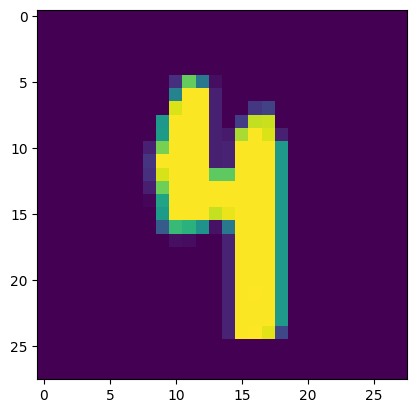

tensor(4)


In [ ]:
plt.imshow(x[3].view(28, 28))
plt.show()
print(t.argmax(net(x[3].view(-1, 784))[0]))